In [28]:
import pandas as pd

# 1. Reading the CSV File with correct column names
column_names = ['Rk', 'Player', 'Class', 'Pos', 'School', 'G', 'MP', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'FT%', 'PER', 'WS', 'BPM']
df = pd.read_csv('acc_players-2324F.csv', skiprows=1, names=column_names)

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())


First 5 rows of the DataFrame:
   Rk         Player  Class  Pos          School   G   MP  TRB  AST  STL  ...  \
0  Rk         Player  Class  Pos          School   G   MP  TRB  AST  STL  ...   
1   1   Amaree Abram     SO    G    Georgia Tech  10  108   17   11    1  ...   
2   2   Sola Adebisi     FR    F   Florida State   7    9    1    1    0  ...   
3   3  Prince Aligbe     SO    F  Boston College  35  651  119   21   15  ...   
4   4     Abe Atiyeh     SR    G  Boston College   4    6    0    0    0  ...   

   TOV  PF  PTS    FG%    2P%    3P%    FT%  PER    WS   BPM  
0  TOV  PF  PTS    FG%    2P%    3P%    FT%  PER    WS   BPM  
1    9  10   34  0.262  0.318    0.2  0.615  4.1  -0.1  -6.4  
2    1   1    2    0.5    0.5    NaN    NaN  3.5     0  -6.7  
3   30  51  164  0.435  0.522  0.147   0.62  9.4   0.9  -1.3  
4    1   0    3  0.333      0      1    NaN  1.1     0  -8.2  

[5 rows x 21 columns]


In [30]:
# 2. Basic Analysis
# Convert 'PTS' and 'TRB' columns to numeric, forcing errors to NaN
df['PTS'] = pd.to_numeric(df['PTS'], errors='coerce')
df['TRB'] = pd.to_numeric(df['TRB'], errors='coerce')

# Drop rows with NaN values in 'PTS' and 'TRB' columns if any
df = df.dropna(subset=['PTS', 'TRB'])

# Calculate the total points scored by all players
total_points = df['PTS'].sum()
print(f"Total points scored by all players: {total_points}")

# Find the player who has played the most minutes
most_minutes_player = df.loc[df['MP'].idxmax()]['Player']
print(f"Player with the most minutes: {most_minutes_player}")

# Identify the top 5 players in terms of total rebounds
top_5_rebounds = df.nlargest(5, 'TRB')[['Player', 'TRB']]
print("Top 5 players in terms of total rebounds:")
print(top_5_rebounds)

Total points scored by all players: 38411.0
Player with the most minutes: Ian Schieffelin
Top 5 players in terms of total rebounds:
              Player    TRB
6      Armando Bacot  380.0
179  Ian Schieffelin  340.0
91   Harrison Ingram  327.0
45    Mohamed Diarra  311.0
150    Norchad Omier  309.0


In [31]:
# 3. Player Filtering
# Create a new DataFrame containing only players who played more than 500 minutes
df['MP'] = pd.to_numeric(df['MP'], errors='coerce')
df['AST'] = pd.to_numeric(df['AST'], errors='coerce')
df['BLK'] = pd.to_numeric(df['BLK'], errors='coerce')
filtered_df = df[df['MP'] > 500].dropna(subset=['AST'])

# Determine the player with the highest total assists
highest_assists_player = filtered_df.loc[filtered_df['AST'].idxmax()]['Player']
print(f"Player with the highest total assists: {highest_assists_player}")

# Identify the top 3 players in terms of assists
top_3_assists = filtered_df.nlargest(3, 'AST')[['Player', 'AST']]
print("Top 3 Assist Leads in the League:")
print(top_3_assists)

# Identify the top 3 players in terms of blocks
top_3_blocks = filtered_df.nlargest(3, 'BLK')[['Player', 'BLK']]
print("Top 3 Shot Blockers:")
print(top_3_blocks)

Player with the highest total assists (filtered): Reece Beekman
Top 3 Assist Leads in the League:
             Player  AST
8     Reece Beekman  212
216  Jaeden Zackery  152
22    Elliot Cadeau  150
Top 3 Shot Blockers:
            Player  BLK
52       Ryan Dunn   77
158   Quinten Post   61
6    Armando Bacot   56


In [35]:
# 4. School-Based Analysis
# Group the players by School and calculate the total points scored by each school.
school_points = df.groupby('School')['PTS'].sum().sort_values(ascending=False)
print("Total points scored by each school:")
print(school_points)
print()

# Group the players by School and calculate the total assists (AST) for each team.
school_assists = df.groupby('School')['AST'].sum().sort_values(ascending=False)
print("Total assists by each school:")
print(school_assists)
print()

# Sort the schools by total points scored and display the top 3 schools
top_3_schools = school_points.head(3)
print("Top 3 schools by total points scored:")
print(top_3_schools)
print()

Total points scored by each school:
School
NC State          3101.0
North Carolina    3032.0
Duke              2830.0
Clemson           2785.0
Wake Forest       2733.0
Boston College    2667.0
Virginia Tech     2547.0
Florida State     2526.0
Pittsburgh        2495.0
Syracuse          2442.0
Miami (FL)        2424.0
Louisville        2304.0
Georgia Tech      2272.0
Virginia          2140.0
Notre Dame        2113.0
Name: PTS, dtype: float64

Total assists by each school:
School
Duke              551
NC State          536
North Carolina    536
Clemson           533
Virginia Tech     514
Boston College    509
Virginia          509
Miami (FL)        454
Pittsburgh        452
Syracuse          442
Wake Forest       429
Georgia Tech      425
Florida State     406
Louisville        356
Notre Dame        335
Name: AST, dtype: int64

Top 3 schools by total points scored:
School
NC State          3101.0
North Carolina    3032.0
Duke              2830.0
Name: PTS, dtype: float64



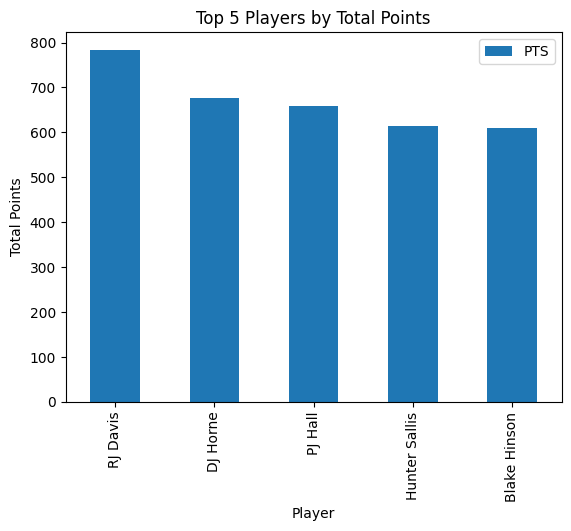

Correlation between FG% and WS: 0.4210663894199782


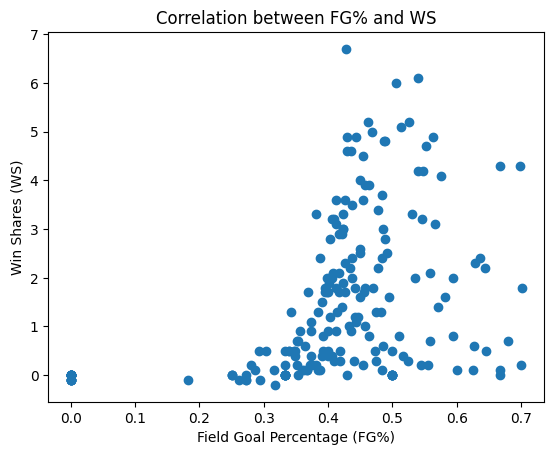

In [36]:
import matplotlib.pyplot as plt

# 5. Extra Credit (Bonus)
# Create a bar chart showing the top 5 players by total points scored
top_5_players_points = df.nlargest(5, 'PTS')[['Player', 'PTS']]
top_5_players_points.plot(kind='bar', x='Player', y='PTS', title='Top 5 Players by Total Points')
plt.xlabel('Player')
plt.ylabel('Total Points')
plt.show()

# Investigate correlation between FG% and WS
# Convert 'FG%' and 'WS' columns to numeric, forcing errors to NaN
df['FG%'] = pd.to_numeric(df['FG%'], errors='coerce')
df['WS'] = pd.to_numeric(df['WS'], errors='coerce')

# Drop rows with NaN values in 'FG%' and 'WS' columns if any
df = df.dropna(subset=['FG%', 'WS'])

# Calculate the correlation coefficient
correlation = df[['FG%', 'WS']].corr().iloc[0, 1]
print(f"Correlation between FG% and WS: {correlation}")

# Provide a scatter plot
plt.scatter(df['FG%'], df['WS'])
plt.xlabel('Field Goal Percentage (FG%)')
plt.ylabel('Win Shares (WS)')
plt.title('Correlation between FG% and WS')
plt.show()